In [ ]:
# unpickle the data
import pickle
with open('/content/images.p','rb') as f:
  images = pickle.load(f)
with open('/content/labels.p','rb') as f:
  labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)

(263, 100, 100)
(263,)


In [ ]:
labels

array(['Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi',
       'Mansi', 'Mansi', 'Mansi', 'Mansi', 'Mansi', 'purnima', 'purnima',
       'purnima'

In [ ]:
set(labels)

{'Mansi', 'purnima', 'sonali'}

In [ ]:
# labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
set(labels)

{0, 1, 2}

In [ ]:
le.inverse_transform([0,1,2])

array(['Mansi', 'purnima', 'sonali'], dtype='<U7')

In [ ]:
import numpy as np


In [ ]:
p=len(set(labels))
print('number of persons:',p)


number of persons: 3


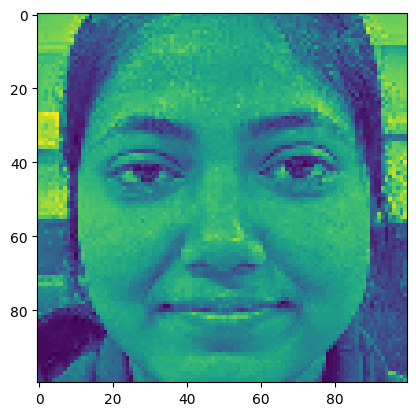

In [ ]:
# plotting
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()

In [ ]:
import cv2

In [ ]:
def preprocessing(img):

  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img

In [ ]:
images=np.array(list(map(preprocessing,images)))
print('shape of input data:',images.shape)

shape of input data: (263, 100, 100, 1)


In [ ]:
from keras.utils import to_categorical
labels=to_categorical(labels)

In [ ]:
from keras .models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

In [ ]:
def Lenet_model():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  # flatten layer
  model.add(Flatten())
 # hidden layer
  model.add(Dense(100,activation='relu'))
  model.add(Dense(50,activation='relu'))


# output layer
  model.add(Dense(p,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=Lenet_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 96, 96, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 46, 46, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 23, 23, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 7935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │         793,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803,648 (3.07 MB)

 Trainable params: 803,648 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
h=model.fit(images,labels,epochs=10,validation_split=0.1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 1.0000 - loss: 7.9965e-07 - val_accuracy: 0.9259 - val_loss: 0.5203
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy: 1.0000 - loss: 3.2441e-07 - val_accuracy: 0.9259 - val_loss: 0.5211
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 1.0000 - loss: 1.0353e-06 - val_accuracy: 0.9259 - val_loss: 0.5216
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 505ms/step - accuracy: 1.0000 - loss: 6.9528e-07 - val_accuracy: 0.9259 - val_loss: 0.5219
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 1.0000 - loss: 3.8306e-07 - val_accuracy: 0.9259 - val_loss: 0.5222
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 1.0000 - loss: 3.7557e-07 - val_accuracy: 0.9259 - val_loss: 0.5224
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 1.0000 - loss: 2.6584e-07 - val_accuracy: 0.9259 - val_loss: 0.5225
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 1.0000 - loss: 2.3473e-07 - 

In [ ]:
model.save('final_model.h5')
print('Model saved successfully')

Model saved successfully
